<a href="https://colab.research.google.com/github/UndekotiRowan/Helmet-Detection-Using-yolo-V8n-/blob/main/HELMET_V!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# --- 1. Install Libraries ---
print("Installing ultralytics and roboflow...")
!pip install -q ultralytics roboflow

Installing ultralytics and roboflow...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 105.0 MB/s eta 0:00:00


In [ ]:
# --- 2. Download Your Chosen Dataset ---
from roboflow import Roboflow
import os

In [ ]:
from google.colab import userdata
userdata.get('ROBOFLOW_API_KEY')

In [ ]:
rf = Roboflow(api_key="ROBOFLOW_API_KEY")

In [ ]:
# This points to the exact dataset you selected
project = rf.workspace("infernal-3whye").project("full_dataset-vwxcb")
dataset = project.version(1).download("yolov8") # Using Version 1

# --- 3. Store the Dataset Path ---
# This is the path to our data.yaml file, which we need for training
dataset_path = dataset.location

print("---")
print(f"Dataset downloaded to: {dataset_path}")
print(f"Your data.yaml file is at: {dataset_path}/data.yaml")
print("---")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to full_dataset-1 in yolov8:: 100%|██████████| 23276/23276 [00:03<00:00, 7277.32it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
---
Dataset downloaded to: /content/full_dataset-1
Your data.yaml file is at: /content/full_dataset-1/data.yaml
---


In [ ]:
import yaml

# Path to your new dataset's YAML file
# Note: The folder name might be 'helmet_human_face_2-xuvmf-1' or similar
yaml_file_path = f'{dataset_path}/data.yaml'

try:
    with open(yaml_file_path, 'r') as file:
        data = yaml.safe_load(file)

        # Print the class names
        print("---")
        print("Successfully read the data.yaml file.")
        print(f"Number of classes (nc): {data['nc']}")
        print(f"Class names: {data['names']}")
        print("---")

except FileNotFoundError:
    print(f"Error: Could not find the file at {yaml_file_path}")
    print("Please make sure the 'dataset_path' variable is set correctly from the download step.")
except Exception as e:
    print(f"An error occurred: {e}")

---
Successfully read the data.yaml file.
Number of classes (nc): 2
Class names: ['Human-face', 'helmet']
---


In [ ]:
from ultralytics import YOLO

print(f"Starting training on {dataset_path}...")

# 1. Load the pre-trained model (YOLOv8-Nano)
model = YOLO('yolov8n.pt')

# 2. Start the training (fine-tuning) process
results = model.train(
   data=f'{dataset_path}/data.yaml',  # Path to your data.yaml file
   epochs=50,                       # 50 cycles. Increase to 100 for better accuracy
   imgsz=640,                       # 640x640 resolution, as we selected
   name='100_new_face_helmet_detector'         # A name for the output folder
)

print("---")
print("Training complete!")
print("Your new model is saved in the folder: /content/runs/detect/full_dataset_50_new_face_helmet_detector")
print("---")

Starting training on /content/full_dataset-1...
Ultralytics 8.3.227 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/full_dataset-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=100_new_face_helmet_detector2, nbs=64, nms=False, opset=None, optimize=False, optimiz

**train part completed\**

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Loading custom model from: /content/drive/MyDrive/YOLOv8_FACE_person_helmet_/new_face_helmet_detector/weights/best.pt
Running prediction on: /content/dc-Cover-mdmk6mpl3ea84k1cn6pln9rrv5-20160306024001.Medi.jpeg

image 1/1 /content/dc-Cover-mdmk6mpl3ea84k1cn6pln9rrv5-20160306024001.Medi.jpeg: 384x640 3 Human-faces, 512.0ms
Speed: 14.4ms preprocess, 512.0ms inference, 39.0ms postprocess per image at shape (1, 3, 384, 640)
Detection complete. Displaying result:


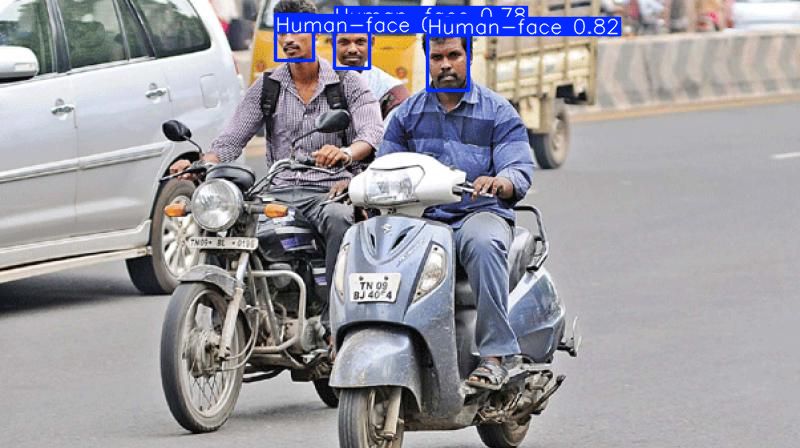

In [ ]:
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
import cv2

# --- 1. Define Paths ---
model_path = '/content/drive/MyDrive/YOLOv8_FACE_person_helmet_/new_face_helmet_detector/weights/best.pt'
image_path = '/content/dc-Cover-mdmk6mpl3ea84k1cn6pln9rrv5-20160306024001.Medi.jpeg'

# --- 2. Load Your Custom Model ---
print(f"Loading custom model from: {model_path}")
model = YOLO(model_path)

# --- 3. Run Prediction ---
# This will detect ALL classes: 'Human-face' and 'helmet'
print(f"Running prediction on: {image_path}")
results = model.predict(image_path)

# --- 4. Display the Result ---
print("Detection complete. Displaying result:")
img_with_boxes = results[0].plot() # .plot() draws the boxes on the image
cv2_imshow(img_with_boxes)

Loading custom model from: /content/drive/MyDrive/YOLOv8_FACE_person_helmet_/new_face_helmet_detector/weights/best.pt
Running prediction on: /content/group4.jpg

image 1/1 /content/group4.jpg: 576x640 1 Human-face, 2 helmets, 370.4ms
Speed: 10.7ms preprocess, 370.4ms inference, 3.0ms postprocess per image at shape (1, 3, 576, 640)
Detection complete. Displaying result:


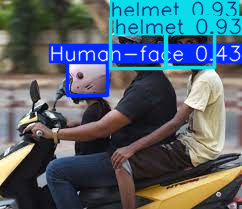

In [ ]:
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
import cv2

# --- 1. Define Paths ---
# This path correctly points to the results of your training run
model_path = '/content/drive/MyDrive/YOLOv8_FACE_person_helmet_/new_face_helmet_detector/weights/best.pt'
image_path = '/content/group4.jpg'

# --- 2. Load Your Custom Model ---
print(f"Loading custom model from: {model_path}")
model = YOLO(model_path)

# --- 3. Run Prediction ---
print(f"Running prediction on: {image_path}")
results = model.predict(image_path)

# --- 4. Display the Result ---
print("Detection complete. Displaying result:")
img_with_boxes = results[0].plot() # .plot() draws the boxes on the image
cv2_imshow(img_with_boxes)

In [ ]:
# saving to drive

In [ ]:
import os

# This is the folder your training run was saved to in Colab
source_folder = '/content/runs/detect/new_face_helmet_detector'

# This is the folder we will create in your Google Drive
destination_folder = '/content/drive/MyDrive/YOLOv8_FACE_person_helmet'

print(f"Copying '{source_folder}' to '{destination_folder}'...")

# The -r flag means "recursive" (copy the folder and everything inside it)
!cp -r {source_folder} {destination_folder}

print("---")
print("Copy complete!")
print(f"Check your Google Drive for the '{os.path.basename(source_folder)}' folder.")

Copying '/content/runs/detect/new_face_helmet_detector' to '/content/drive/MyDrive/YOLOv8_FACE_person_helmet'...
---
Copy complete!
Check your Google Drive for the 'new_face_helmet_detector' folder.


In [ ]:
# eval

In [ ]:
from ultralytics import YOLO

# --- 1. Load Your Trained Model ---
# This path must point to your trained model file
model_path = '/content/drive/MyDrive/YOLOv8_FACE_person_helmet_/new_face_helmet_detector/weights/best.pt'
model = YOLO(model_path)

# --- 2. Run Evaluation ---
# This will run the model on the 'val' dataset specified in your data.yaml
print("Starting evaluation...")
metrics = model.val()

# --- 3. Print Key Results ---
print("\n--- Evaluation Metrics ---")
print(f"mAP50-95: {metrics.box.map}")  # mAP@.5:.95
print(f"mAP50: {metrics.box.map50}")    # mAP@.5
print(f"Precision: {metrics.box.p[0]}")  # Precision for your first class
print(f"Recall: {metrics.box.r[0]}")     # Recall for your first class
print("--------------------------")

Starting evaluation...
Ultralytics 8.3.227 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 743.1±325.2 MB/s, size: 44.6 KB)
val: Scanning /content/helmet_human_face_2-1/valid/labels.cache... 1599 images, 3 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1599/1599 1.5Mit/s 0.0s
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 566, len(boxes) = 3104. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 100/100 6.0it/s 16.7s
                   all       1599       3104      0.964      0.938      0.974      0.823
            Human-face       1117       2538      0.942      0.887      0.954      0.701
  

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();

      // --- THIS IS THE FIX ---
      // It is now 'toDataURL' instead of 'to_DATA_URL'
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))

  # Decode the base64 image
  img_data = b64decode(data.split(',')[1])

  # Convert to a NumPy array
  img_np = np.frombuffer(img_data, dtype=np.uint8)

  # Decode the image to OpenCV format
  img = cv2.imdecode(img_np, flags=1)

  return img

Loading custom model from: /content/drive/MyDrive/YOLOv8_FACE_person_helmet_/new_face_helmet_detector/weights/best.pt
Please allow webcam access and click the 'Capture' button.


<IPython.core.display.Javascript object>

Photo captured!
Running detection on the captured photo...

0: 480x640 1 helmet, 6.5ms
Speed: 1.3ms preprocess, 6.5ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)
Detection complete. Displaying result:


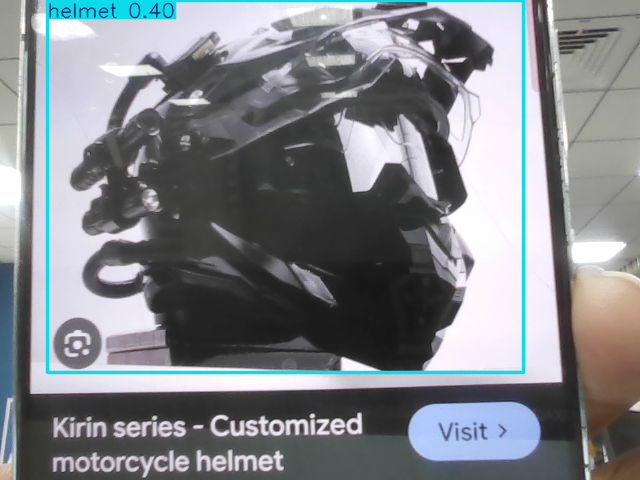

In [ ]:
from ultralytics import YOLO

# --- 1. Load Your Custom Model ---
model_path = '/content/drive/MyDrive/YOLOv8_FACE_person_helmet_/new_face_helmet_detector/weights/best.pt'
print(f"Loading custom model from: {model_path}")
model = YOLO(model_path)

try:
  # --- 2. Take the Photo ---
  print("Please allow webcam access and click the 'Capture' button.")
  img = take_photo()
  print('Photo captured!')

  # --- 3. Run Detection ---
  print("Running detection on the captured photo...")
  # This will detect all classes: 'helmet' and 'Human-face'
  results = model.predict(img)

  # --- 4. Display the Result ---
  img_with_boxes = results[0].plot() # Get the image with boxes

  print("Detection complete. Displaying result:")
  cv2_imshow(img_with_boxes)

except Exception as err:
  # This will catch errors if you deny webcam access
  print(f"An error occurred: {err}")

In [ ]:
##test datatest

In [ ]:
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
import glob
import os
import cv2

# --- 1. Load Your Custom Model ---
model_path = '/content/drive/MyDrive/YOLOv8_FACE_person_helmet_/new_face_helmet_detector/weights/best.pt'
print(f"Loading custom model from: {model_path}")
model = YOLO(model_path)

# --- 2. Define the Path to Your Test Images ---
# This uses the 'dataset_path' variable from your download step
# to find the 'test/images' folder.
test_images_dir = f'{dataset_path}/test/images/'

# Get a list of all images in that folder
image_paths = glob.glob(f'{test_images_dir}/*')

print(f"Found {len(image_paths)} images in the test folder.")
print("Starting predictions...")

# --- 3. Loop Through Each Image and Display the Result ---
for image_path in image_paths:
    try:
        # Print which image is being processed
        print(f"\n--- Predicting on: {os.path.basename(image_path)} ---")

        # Run prediction (verbose=False keeps the log clean)
        results = model.predict(image_path, verbose=False)

        # Get the image with boxes drawn on it
        img_with_boxes = results[0].plot()

        # Display the image in Colab
        cv2_imshow(img_with_boxes)

    except Exception as e:
        print(f"Could not process {image_path}: {e}")

print("\n--- Test set prediction complete. ---")

Loading custom model from: /content/drive/MyDrive/YOLOv8_FACE_person_helmet_/new_face_helmet_detector/weights/best.pt


NameError: name 'dataset_path' is not defined